<a href="https://colab.research.google.com/github/Praneeth-18/DataMining5/blob/main/Time%20Series%20dataset/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets for CMPE 255/mcdonalds_dataset.csv"
df = pd.read_csv(path)

In [5]:
# Display the first few rows of the dataset
df.head()

,lat,lon,alt,is_broken,is_active,dot,state,city,street,country,last_checked
0,-73.988281,40.718830,0,False,True,working,NY,New York,114 Delancey St,USA,Checked 142 minutes ago
1,-74.005090,40.728794,0,False,True,working,NY,New York,208 Varick St,USA,Checked 142 minutes ago
2,-73.993408,40.729197,0,False,True,working,NY,New York,724 Broadway,USA,Checked 142 minutes ago
3,-73.985855,40.726555,0,False,True,working,NY,New York,102 1st Ave,USA,Checked 142 minutes ago
4,-73.991692,40.691383,0,True,True,broken,NY,Brooklyn,82 Court St,USA,Checked 142 minutes ago


In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()

missing_values

lat                0
lon                0
alt                0
is_broken          0
is_active          0
dot                0
state           3946
city               8
street             0
country            0
last_checked       0
dtype: int64

# **EDA**

In [8]:
# Distribution of 'state' and 'country' columns
state_distribution = df['state'].value_counts()
country_distribution = df['country'].value_counts()

state_distribution, country_distribution

(CA            1158
 TX            1056
 FL             819
 IL             626
 OH             585
 NY             560
 MI             501
 PA             456
 NC             440
 GA             421
 VA             380
 IN             329
 TN             308
 MO             295
 WI             281
 MD             256
 AZ             253
 KY             243
 NJ             242
 WA             236
 AL             230
 MA             222
 LA             217
 SC             215
 MN             209
 CO             184
 OK             182
 AR             159
 OR             148
 IA             137
 KS             136
 MS             134
 CT             130
 NV             117
 UT             102
 WV              99
 NM              88
 NE              76
 HI              71
 ME              57
 ID              56
 NH              51
 MT              45
 DE              35
 RI              29
 SD              27
 WY              25
 DC              25
 VT              24
 AK              24


In [9]:
# Distribution of 'is_broken', 'is_active', and 'dot' columns
is_broken_distribution = df['is_broken'].value_counts()
is_active_distribution = df['is_active'].value_counts()
dot_distribution = df['dot'].value_counts()

is_broken_distribution, is_active_distribution, dot_distribution

(False    14814
 True      1857
 Name: is_broken, dtype: int64,
 True     16352
 False      319
 Name: is_active, dtype: int64,
 working     14495
 broken       1857
 inactive      319
 Name: dot, dtype: int64)

In [11]:
# Summary statistics for 'lat', 'lon', and 'alt' columns
numerical_summary = df[['lat', 'lon', 'alt']].describe()

numerical_summary

,lat,lon,alt
count,16671.000000,16671.000000,16671.0
mean,-76.600800,40.406232,0.0
std,37.309030,7.250517,0.0
min,-159.368738,19.517590,0.0
25%,-95.572842,34.927834,0.0
50%,-83.780231,40.213555,0.0
75%,-75.261739,44.860442,0.0
max,14.968594,64.859406,0.0


# **Visualization**

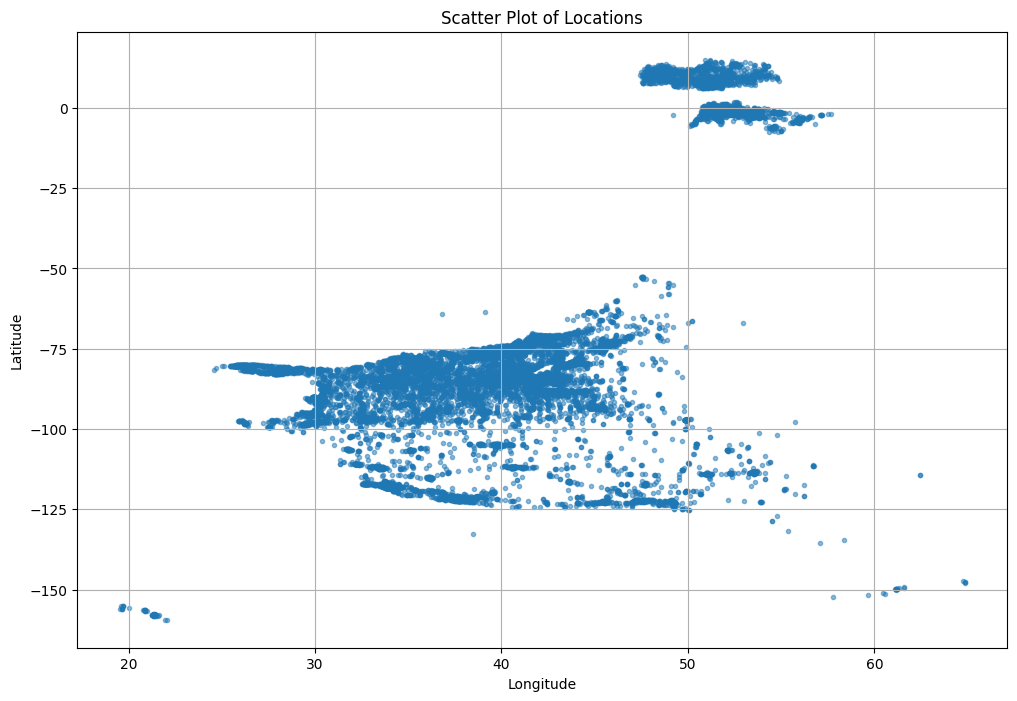

In [12]:
import matplotlib.pyplot as plt

# Scatter plot of latitude and longitude
plt.figure(figsize=(12, 8))
plt.scatter(df['lon'], df['lat'], alpha=0.5, marker='.')
plt.title('Scatter Plot of Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# **Missing values**

In [13]:
# Check for missing values in each column
missing_values = df.isnull().sum()

missing_values

lat                0
lon                0
alt                0
is_broken          0
is_active          0
dot                0
state           3946
city               8
street             0
country            0
last_checked       0
dtype: int64

In [14]:
# Fill missing values in 'state' and 'city' columns with 'Unknown'
df['state'].fillna('Unknown', inplace=True)
df['city'].fillna('Unknown', inplace=True)

# Check if missing values are filled
missing_values_updated = df[['state', 'city']].isnull().sum()

missing_values_updated

state    0
city     0
dtype: int64

In [15]:
# Filter rows where 'state' is 'Maharastra'
maharastra_entries = df[df['state'] == 'Maharastra']

maharastra_entries[['state', 'country']]

,state,country
3994,Maharastra,USA
4170,Maharastra,USA
12632,Maharastra,USA


In [16]:
# Correcting the entries for 'Maharastra'
df.loc[df['state'] == 'Maharastra', 'country'] = 'IN'
df.loc[df['state'] == 'Maharastra', 'state'] = 'Maharashtra'

# Checking 'CA' entries in the 'country' column
ca_country_entries = df[df['country'] == 'CA']

ca_country_entries[['state', 'country']].head()  # Displaying the first few rows for clarity


,state,country
12725,Unknown,CA
12726,Unknown,CA
12727,Unknown,CA
12728,Unknown,CA
12729,Unknown,CA


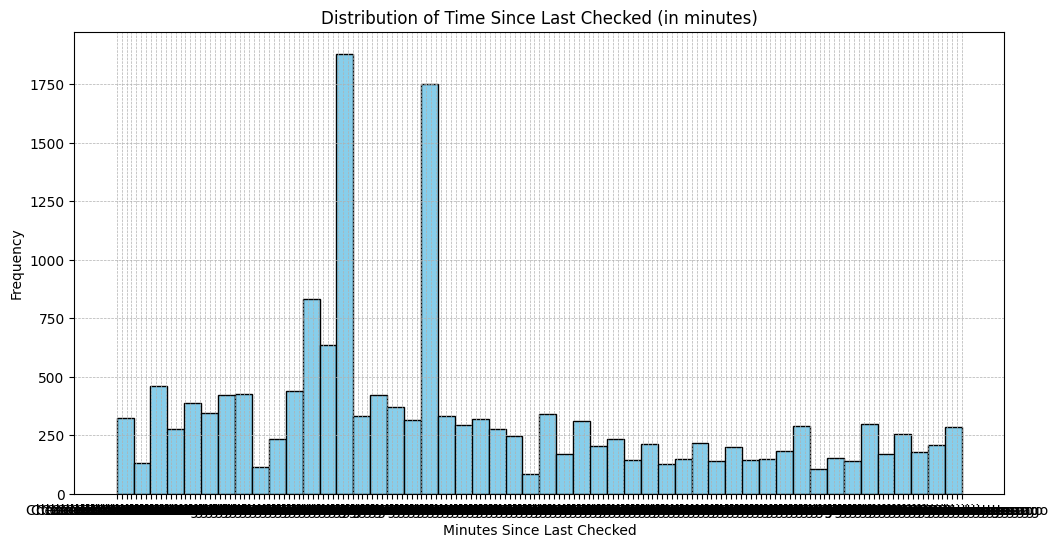

In [17]:
# Histogram for 'last_checked' column
plt.figure(figsize=(12, 6))
plt.hist(df['last_checked'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Time Since Last Checked (in minutes)')
plt.xlabel('Minutes Since Last Checked')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

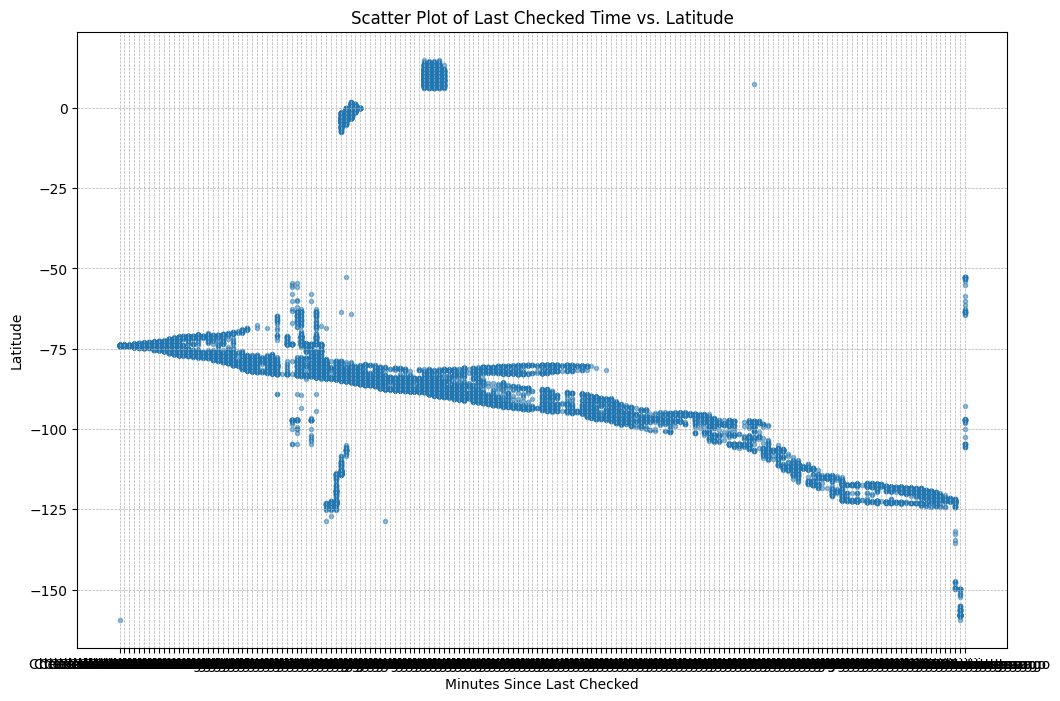

In [18]:
# Time Series Scatter Plot using 'last_checked' and 'lat'
plt.figure(figsize=(12, 8))
plt.scatter(df['last_checked'], df['lat'], alpha=0.5, marker='.')
plt.title('Scatter Plot of Last Checked Time vs. Latitude')
plt.xlabel('Minutes Since Last Checked')
plt.ylabel('Latitude')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


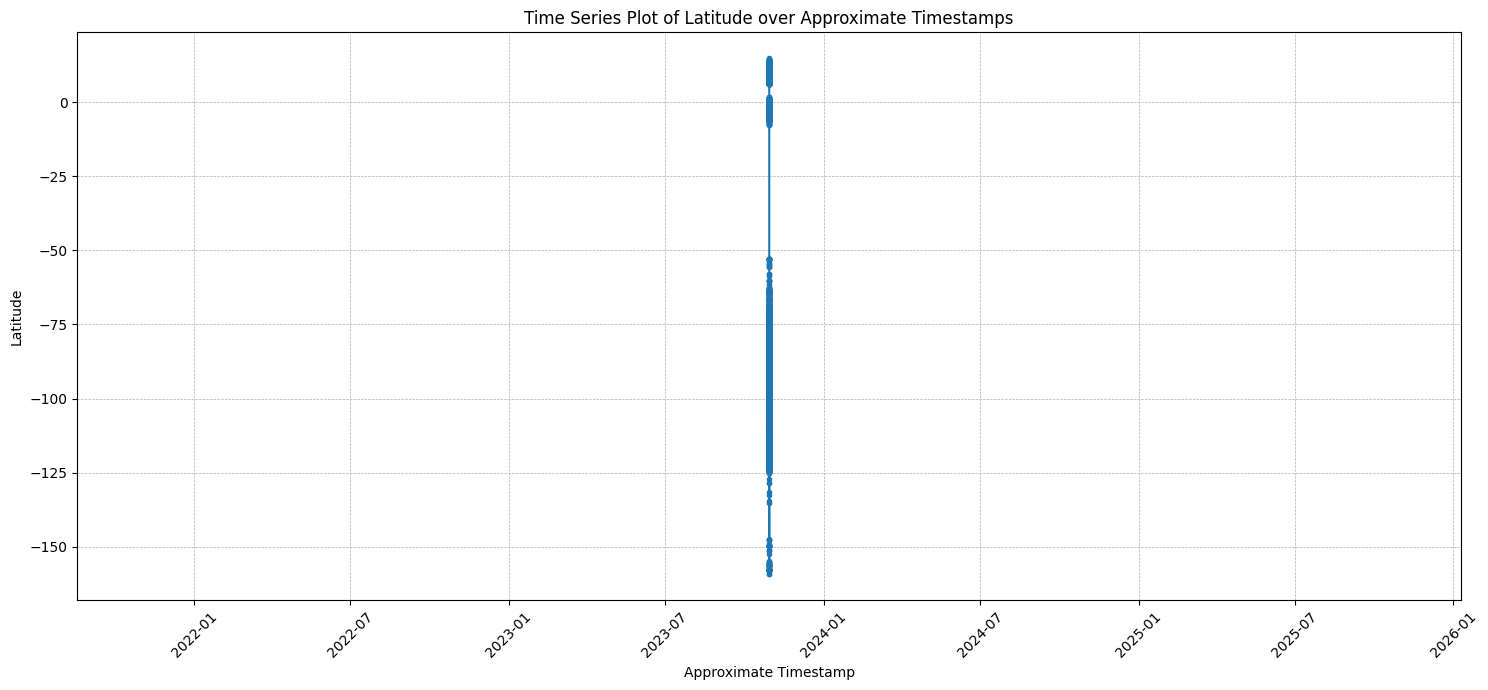

In [21]:
# Convert the 'last_checked' column to float, setting errors='coerce' to handle non-numeric values
df['last_checked'] = pd.to_numeric(df['last_checked'], errors='coerce')

# Fill any NaN values (resulting from the conversion) with a default value, e.g., 0
df['last_checked'].fillna(0, inplace=True)

# Recalculate the approximate timestamp for each observation
df['approx_timestamp'] = df['last_checked'].apply(lambda x: now - datetime.timedelta(minutes=x))

# Sort the data by the approximate timestamp and plot again
data_sorted = df.sort_values(by='approx_timestamp')

# Time Series Plot
plt.figure(figsize=(15, 7))
plt.plot(data_sorted['approx_timestamp'], data_sorted['lat'], marker='.', linestyle='-')
plt.title('Time Series Plot of Latitude over Approximate Timestamps')
plt.xlabel('Approximate Timestamp')
plt.ylabel('Latitude')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# **Clustering**

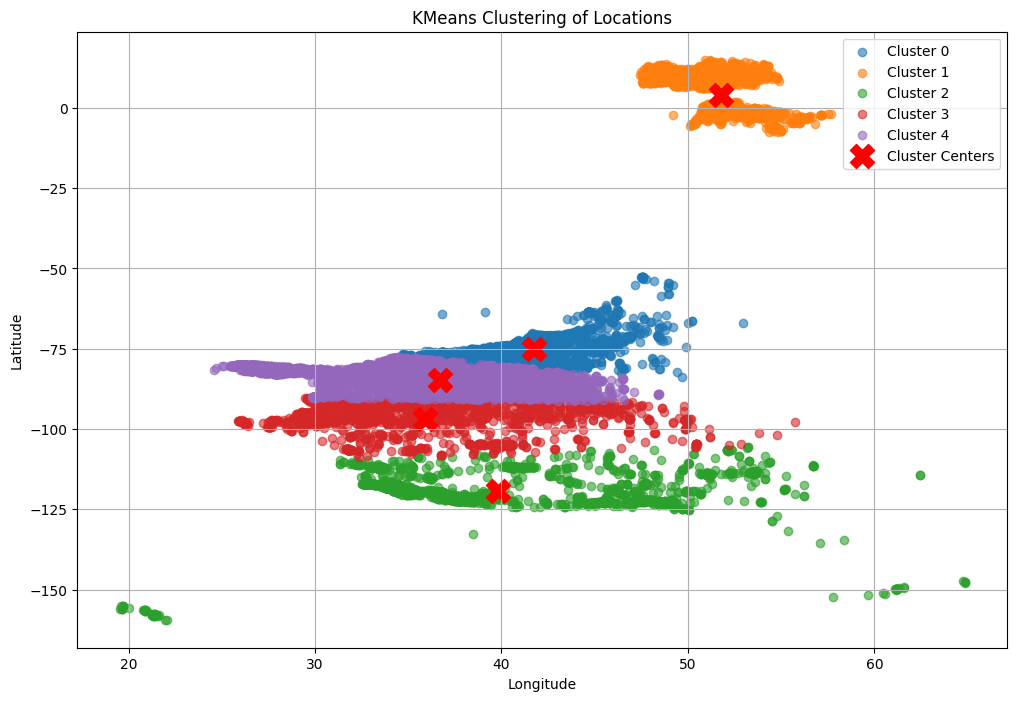

In [24]:
# Re-importing necessary libraries and reloading the dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Fill missing values in 'state' and 'city' columns with 'Unknown'
df['state'].fillna('Unknown', inplace=True)
df['city'].fillna('Unknown', inplace=True)

# Correcting the entries for 'Maharastra'
df.loc[df['state'] == 'Maharastra', 'country'] = 'IN'
df.loc[df['state'] == 'Maharastra', 'state'] = 'Maharashtra'

# Convert the 'last_checked' column to float, setting errors='coerce' to handle non-numeric values
df['last_checked'] = pd.to_numeric(df['last_checked'], errors='coerce')
df['last_checked'].fillna(0, inplace=True)

# Extracting latitude and longitude for clustering
X = df[['lat', 'lon']]

# Initialize KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(12, 8))
for cluster_num in range(5):
    cluster_data = df[df['cluster'] == cluster_num]
    plt.scatter(cluster_data['lon'], cluster_data['lat'], label=f"Cluster {cluster_num}", alpha=0.6)

# Plotting the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red', marker='X', label="Cluster Centers")
plt.title('KMeans Clustering of Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


# **Anomaly Detection**

In [25]:
import numpy as np
from scipy.stats import zscore

# Calculate the distance of each point from its cluster center
df['distance_from_center'] = np.sqrt(
    (df['lat'] - kmeans.cluster_centers_[df['cluster'], 0]) ** 2 +
    (df['lon'] - kmeans.cluster_centers_[df['cluster'], 1]) ** 2
)

# Compute Z-scores for the distances
df['z_score'] = zscore(df['distance_from_center'])

# Identify anomalies: rows where Z-score > 3 (this threshold can be adjusted)
anomalies = df[df['z_score'] > 3]

# Number of anomalies detected
num_anomalies = anomalies.shape[0]
num_anomalies


145

# **Data Imputation**

In [26]:
# Check for missing values in the entire dataset
missing_values_df = df.isnull().sum()

missing_values_df[missing_values_df > 0]  # Display columns with missing values


Series([], dtype: int64)

# **Models**

In [27]:
# Install H2O
!pip install h2o

# Import necessary libraries
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Load data into H2O
df_h2o = h2o.H2OFrame(df)

# Set target and input features
target = 'is_broken'
features = df_h2o.columns
features.remove(target)

# Split data into training and test sets
train, test = df_h2o.split_frame(ratios=[0.8])

# AutoML Configuration and Training
aml = H2OAutoML(max_models=20, seed=42, max_runtime_secs=600, sort_metric="AUC")
aml.train(x=features, y=target, training_frame=train)

# Display the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

# Evaluate the best model on the test data
performance = aml.leader.model_performance(test)
print(performance)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=8a2d36714dd3398bf55e671dff95bd9ec539fea2c7e232eae18bf4aec31959fa
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpk77sytex
  JVM stdout: /tmp/tmpk77sytex/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpk77sytex/h2o_unknownUser_s

H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_unknownUser_5lr1td
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
02:25:31.720: _train param, Dropping bad and constant columns: [alt, approx_timestamp, street, last_checked]

███
02:25:52.132: _train param, Dropping bad and constant columns: [alt, approx_timestamp, street, last_checked]

████
02:26:32.593: _train param, Dropping bad and constant columns: [alt, approx_timestamp, street, last_checked]

████████████████
02:29:04.446: _train param, Dropping bad and constant columns: [alt, approx_timestamp, street, last_checked]

█
02:29:12.60: _train param, Dropping bad and constant columns: [alt, approx_timestamp, street, last_checked]

█
02:29:20.943: _train param, Dropping bad and constant columns: [alt, approx_timestamp, street, last_checked]

██████████
02:30:58.287: _train param, Dropping bad and constant columns: [alt, approx_timestamp, street, last_checked]

███████████
02:32:45.800: _train param, Dropping bad and constant columns: [